In [1]:
import pandas as pd
from sqlalchemy import create_engine
from urllib.parse import quote_plus

In [2]:
import psycopg2

def connect_to_postgres(host, port, database, user, password):
    try:
        # Connect to the PostgreSQL database
        connection = psycopg2.connect(
            host=host,
            port=port,
            database=database,
            user=user,
            password=password
        )
        print("Connected to PostgreSQL database successfully!")
        return connection
    except (Exception, psycopg2.Error) as error:
        print("Error while connecting to PostgreSQL", error)
        return None

# Provide your PostgreSQL connection details
host = "localhost"
port = "5432"
database = "postgres"
user = "postgres"
password = "Root@123"

# Connect to the PostgreSQL database
connection = connect_to_postgres(host, port, database, user, password)

# Check if connection is successful before proceeding further
if connection:
    # Add your code here to perform tasks on the database
    pass

Connected to PostgreSQL database successfully!


In [8]:
def fetch_data(connection, query):
    try:
        # Create a cursor object using the connection
        cursor = connection.cursor()

        # Execute the query
        cursor.execute(query)

        # Fetch all the rows
        data = cursor.fetchall()

        # Get the column names
        columns = [desc[0] for desc in cursor.description]

        # Create a DataFrame using the fetched data and column names
        df = pd.DataFrame(data, columns=columns)

        # Close the cursor
        cursor.close()

        return df
    except (Exception, psycopg2.Error) as error:
        print("Error fetching data from PostgreSQL:", error)
        return None


# Define the SQL query to retrieve relevant columns from the xdr_data table
query = """
    SELECT *
    FROM public.xdr_data
"""

# Fetch the data from the database
xdr_data = fetch_data(connection, query)

# Display the first few rows of the fetched data
print(xdr_data.head())

      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...          20247395.0          19111729.0   

In [9]:
# Print column names
print(xdr_data.columns)

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [10]:
def aggregate_user_behavior(data):
    # Group the data by user identifier and aggregate metrics
    aggregated_data = (
        data.groupby(["MSISDN/Number"])
        .agg(
            num_sessions=("Bearer Id", "count"),
            session_duration=("Dur. (ms)", "sum"),
            social_media_dl=("Social Media DL (Bytes)", "sum"),
            social_media_ul=("Social Media UL (Bytes)", "sum"),
            google_dl=("Google DL (Bytes)", "sum"),
            google_ul=("Google UL (Bytes)", "sum"),
            email_dl=("Email DL (Bytes)", "sum"),
            email_ul=("Email UL (Bytes)", "sum"),
            youtube_dl=("Youtube DL (Bytes)", "sum"),
            youtube_ul=("Youtube UL (Bytes)", "sum"),
            netflix_dl=("Netflix DL (Bytes)", "sum"),
            netflix_ul=("Netflix UL (Bytes)", "sum"),
            gaming_dl=("Gaming DL (Bytes)", "sum"),
            gaming_ul=("Gaming UL (Bytes)", "sum"),
            other_dl=("Other DL (Bytes)", "sum"),
            other_ul=("Other UL (Bytes)", "sum"),
        )
        .reset_index()
    )

    return aggregated_data


# Aggregate user behavior data
aggregated_data = aggregate_user_behavior(xdr_data)

# Display the first few rows of the aggregated data
print(aggregated_data.head())

   MSISDN/Number  num_sessions  session_duration  social_media_dl  \
0   3.360100e+10             1          116720.0        2206504.0   
1   3.360100e+10             1          181230.0        2598548.0   
2   3.360100e+10             1          134969.0        3148004.0   
3   3.360101e+10             1           49878.0         251469.0   
4   3.360101e+10             2           37104.0        2861230.0   

   social_media_ul   google_dl  google_ul   email_dl   email_ul  youtube_dl  \
0          25631.0   3337123.0  1051882.0   837400.0   493962.0  14900201.0   
1          62017.0   4197697.0  1137166.0  2828821.0   478960.0   5324251.0   
2          47619.0   3343483.0    99643.0  2436500.0   768880.0   2137272.0   
3          28825.0   5937765.0  3740728.0  2178618.0   106052.0   4393123.0   
4          51312.0  13728668.0  4770948.0  2247808.0  1057661.0  10339971.0   

   youtube_ul  netflix_dl  netflix_ul     gaming_dl   gaming_ul     other_dl  \
0   6724347.0  10265105.0  169

In [11]:
# Describe relevant variables and their data types
def describe_variables(data):
    print("Description of Variables:")
    print(data.info())


# Describe variables in the aggregated data
describe_variables(aggregated_data)

Description of Variables:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106856 entries, 0 to 106855
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   MSISDN/Number     106856 non-null  float64
 1   num_sessions      106856 non-null  int64  
 2   session_duration  106856 non-null  float64
 3   social_media_dl   106856 non-null  float64
 4   social_media_ul   106856 non-null  float64
 5   google_dl         106856 non-null  float64
 6   google_ul         106856 non-null  float64
 7   email_dl          106856 non-null  float64
 8   email_ul          106856 non-null  float64
 9   youtube_dl        106856 non-null  float64
 10  youtube_ul        106856 non-null  float64
 11  netflix_dl        106856 non-null  float64
 12  netflix_ul        106856 non-null  float64
 13  gaming_dl         106856 non-null  float64
 14  gaming_ul         106856 non-null  float64
 15  other_dl          106856 non-null  float64

In [12]:
def compute_basic_metrics(data):
    # Compute basic metrics for numerical variables
    basic_metrics = data.describe()

    return basic_metrics


# Compute basic metrics for the dataset
basic_metrics = compute_basic_metrics(aggregated_data)

# Display the computed basic metrics
print("Basic Metrics:")
print(basic_metrics)

Basic Metrics:
       MSISDN/Number   num_sessions  session_duration  social_media_dl  \
count   1.068560e+05  106856.000000      1.068560e+05     1.068560e+05   
mean    4.511474e+10       1.389777      1.461672e+05     2.502081e+06   
std     2.889423e+12       0.809863      1.863587e+05     1.887588e+06   
min     3.360100e+10       0.000000      7.142000e+03     1.200000e+01   
25%     3.365088e+10       1.000000      7.130800e+04     1.175902e+06   
50%     3.366365e+10       1.000000      1.027400e+05     2.265000e+06   
75%     3.368344e+10       2.000000      1.727990e+05     3.267238e+06   
max     8.823971e+14      18.000000      1.855375e+07     4.274384e+07   

       social_media_ul     google_dl     google_ul      email_dl  \
count    106856.000000  1.068560e+05  1.068560e+05  1.068560e+05   
mean      45886.012802  8.016496e+06  2.865938e+06  2.497352e+06   
std       34717.044775  6.065160e+06  2.172787e+06  1.897063e+06   
min           0.000000  2.070000e+02  3.000000

In [13]:
def compute_dispersion_parameters(data):
    # Compute dispersion parameters for quantitative variables
    dispersion_parameters = data.aggregate(
        [
            "var",
            "std",
            lambda x: x.max() - x.min(),
            lambda x: x.quantile(0.75) - x.quantile(0.25),
        ]
    )

    # Rename the index for better interpretation
    dispersion_parameters.rename(
        index={
            "var": "Variance",
            "std": "Standard Deviation",
            "<lambda_0>": "Range",
            "<lambda_1>": "Interquartile Range",
        },
        inplace=True,
    )

    return dispersion_parameters


# Compute dispersion parameters for the dataset
dispersion_parameters = compute_dispersion_parameters(aggregated_data)

# Display the computed dispersion parameters
print("Dispersion Parameters:")
print(dispersion_parameters)

Dispersion Parameters:
                    MSISDN/Number  num_sessions  session_duration  \
Variance             8.348768e+24      0.655878      3.472955e+10   
Standard Deviation   2.889423e+12      0.809863      1.863587e+05   
<lambda>             8.823635e+14     18.000000      1.854661e+07   
<lambda>             3.256066e+07      1.000000      1.014910e+05   

                    social_media_dl  social_media_ul     google_dl  \
Variance               3.562987e+12     1.205273e+09  3.678617e+13   
Standard Deviation     1.887588e+06     3.471704e+04  6.065160e+06   
<lambda>               4.274382e+07     6.309420e+05  1.161062e+08   
<lambda>               2.091335e+06     3.831850e+04  6.628168e+06   

                       google_ul      email_dl      email_ul    youtube_dl  \
Variance            4.721002e+12  3.598847e+12  2.448865e+11  1.518549e+14   
Standard Deviation  2.172787e+06  1.897063e+06  4.948601e+05  1.232294e+07   
<lambda>            3.608539e+07  3.360711e+07

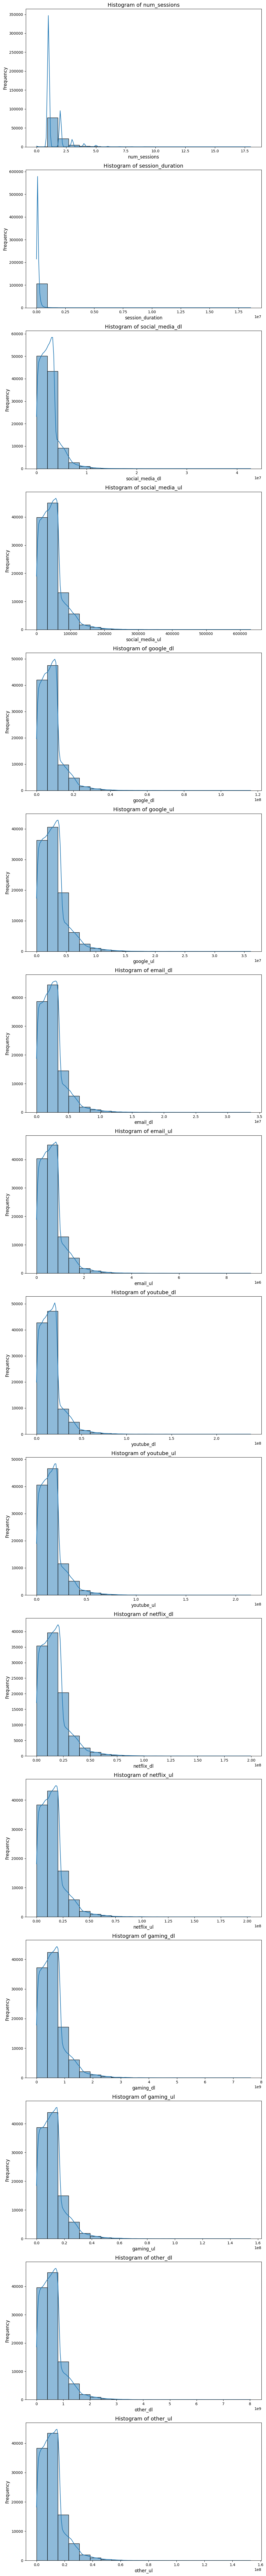

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


def visualize_univariate_analysis(data):
    # Define the list of quantitative variables
    quantitative_vars = data.columns.drop("MSISDN/Number")

    # Set up subplots
    fig, axes = plt.subplots(
        nrows=len(quantitative_vars), ncols=1, figsize=(10, 6 * len(quantitative_vars))
    )

    # Iterate over each variable and create plots
    for i, var in enumerate(quantitative_vars):
        # Histogram
        sns.histplot(data[var], ax=axes[i], kde=True, bins=20)
        axes[i].set_title(f"Histogram of {var}", fontsize=14)
        axes[i].set_xlabel(var, fontsize=12)
        axes[i].set_ylabel("Frequency", fontsize=12)

    # Adjust layout
    plt.tight_layout()
    plt.show()


# Visualize univariate analysis
visualize_univariate_analysis(aggregated_data)

In [15]:
def compute_correlation(data):
    # Compute correlation matrix
    correlation_matrix = data.drop(columns=["MSISDN/Number"]).corr()

    return correlation_matrix


# Compute correlation matrix
correlation_matrix = compute_correlation(aggregated_data)

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                  num_sessions  session_duration  social_media_dl  \
num_sessions          1.000000          0.635722         0.760421   
session_duration      0.635722          1.000000         0.484587   
social_media_dl       0.760421          0.484587         1.000000   
social_media_ul       0.761783          0.486543         0.583055   
google_dl             0.764848          0.491098         0.585202   
google_ul             0.762804          0.482957         0.582765   
email_dl              0.760949          0.491175         0.585432   
email_ul              0.761770          0.485190         0.582011   
youtube_dl            0.763006          0.493270         0.582656   
youtube_ul            0.760572          0.489114         0.582831   
netflix_dl            0.762158          0.482517         0.583691   
netflix_ul            0.760037          0.479476         0.581994   
gaming_dl             0.758159          0.485579         0.580919   
gaming_ul     